## Customer Clustering

**Problem Statement:**
As a Data Scientist at Kalbe Nutritionals, you have been assigned by the marketing team to create customer clusters/segments based on several criteria.

**Objective:**
Create effective customer segmentation. These customer segments will serve as the foundation for the marketing team to provide personalized promotions and sales treatments tailored to each segment.

### Data Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# scalling
from sklearn.preprocessing import StandardScaler
# modelling
from sklearn.cluster import KMeans
#silhoute
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [ ]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, only disable specific warnings based on category
# Example: Disabling DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path='/content/drive/MyDrive/rakamin/kalbe/'

In [ ]:
df = pd.read_csv(folder_path+'df_merged.csv')

In [ ]:
df.head()

,TransactionID,CustomerID,Age,Gender,Marital Status,Income,Date,ProductID,Product Name,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,37,0,Married,"5,35",2022-05-21,P8,Oat,16000,2,32000,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR32057,235,37,0,Married,"5,35",2022-06-10,P7,Coffee Candy,9400,3,28200,7,Buana Indah,Buana,General Trade,3.316694,114.590111
2,TR47938,235,37,0,Married,"5,35",2022-10-18,P3,Crackers,7500,4,30000,7,Buana Indah,Buana,General Trade,3.316694,114.590111
3,TR49065,235,37,0,Married,"5,35",2022-10-08,P5,Thai Tea,4200,4,16800,7,Buana Indah,Buana,General Trade,3.316694,114.590111
4,TR50919,235,37,0,Married,"5,35",2022-08-18,P7,Coffee Candy,9400,4,37600,7,Buana Indah,Buana,General Trade,3.316694,114.590111


### Dataset Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   4908 non-null   object 
 1   CustomerID      4908 non-null   int64  
 2   Age             4908 non-null   int64  
 3   Gender          4908 non-null   int64  
 4   Marital Status  4908 non-null   object 
 5   Income          4908 non-null   object 
 6   Date            4908 non-null   object 
 7   ProductID       4908 non-null   object 
 8   Product Name    4908 non-null   object 
 9   Price_x         4908 non-null   int64  
 10  Qty             4908 non-null   int64  
 11  TotalAmount     4908 non-null   int64  
 12  StoreID         4908 non-null   int64  
 13  StoreName       4908 non-null   object 
 14  GroupStore      4908 non-null   object 
 15  Type            4908 non-null   object 
 16  Latitude        4908 non-null   float64
 17  Longitude       4908 non-null   f

In [ ]:
df.shape

(4908, 18)

### Data aggregation

In [ ]:
aggregated_data = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [ ]:
aggregated_data.rename(columns={'TransactionID' : "TotalTransaction", 'Qty' : 'TotalQuantity'}, inplace=True)

In [ ]:
aggregated_data.head()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
0,1,17,60,623300
1,2,12,56,382300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CustomerID        447 non-null    int64
 1   TotalTransaction  447 non-null    int64
 2   TotalQuantity     447 non-null    int64
 3   TotalAmount       447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [ ]:
aggregated_data.describe()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,10.979866,39.953020,353866.890380
std,129.182042,3.222267,12.655314,123684.551475
min,1.000000,3.000000,10.000000,84300.000000
25%,112.500000,9.000000,31.000000,263700.000000
50%,224.000000,11.000000,39.000000,340800.000000
75%,335.500000,13.000000,48.500000,438850.000000
max,447.000000,21.000000,79.000000,846700.000000


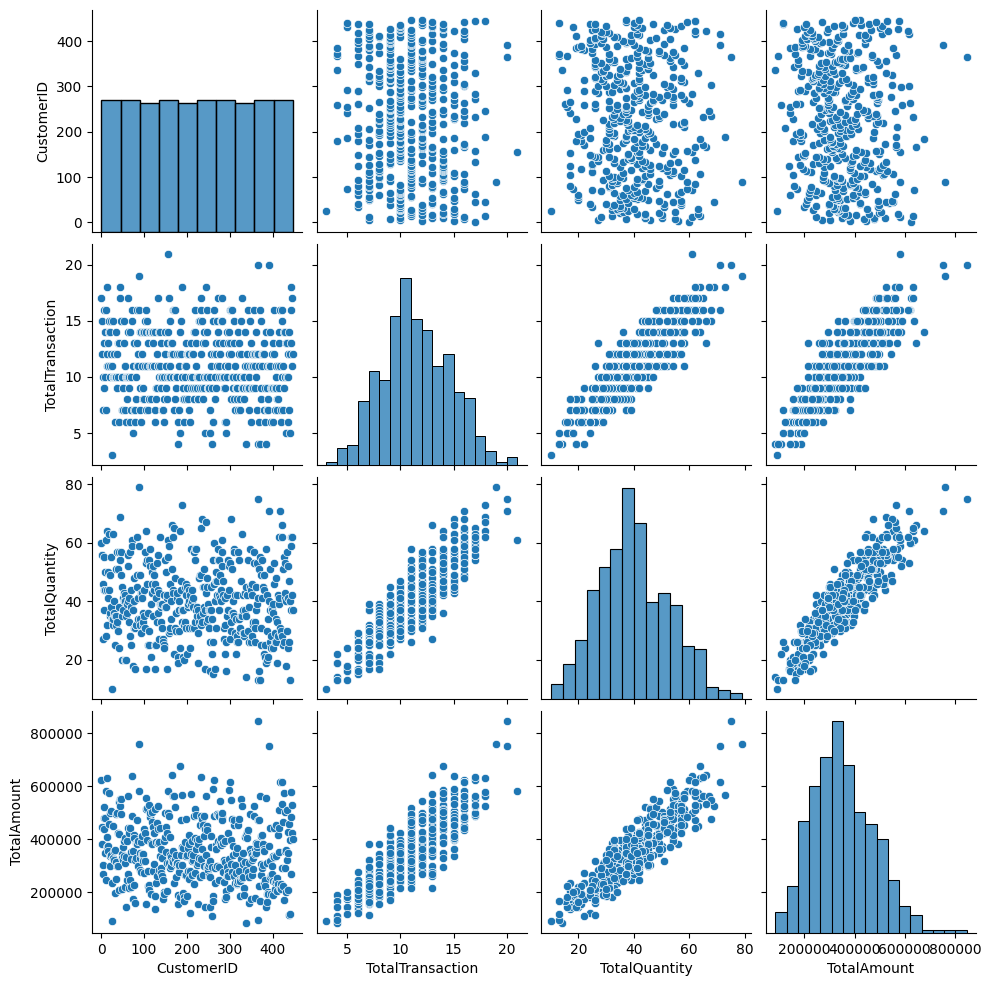

In [ ]:
sns.pairplot(data = aggregated_data)

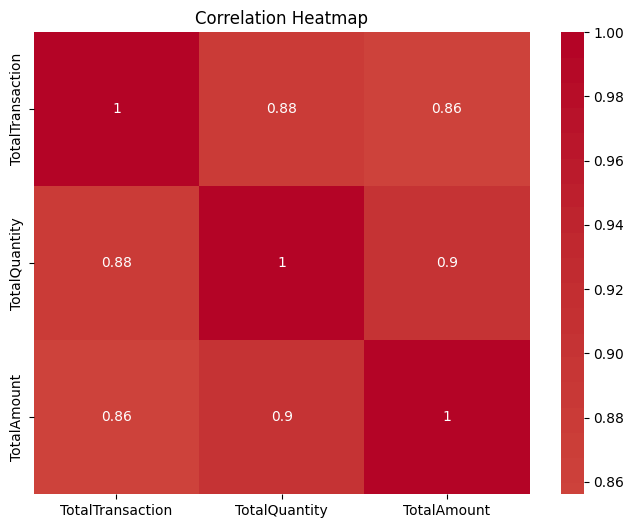

In [ ]:

# Menghitung korelasi antara variabel
correlation_matrix = aggregated_data[['TotalTransaction','TotalQuantity', 'TotalAmount']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

A strong correlation between features can indicate the presence of clear clusters within the data.

### Kmeans

In [ ]:
# Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(aggregated_data[['TotalTransaction','TotalQuantity','TotalAmount']].astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['TotalTransaction','TotalQuantity','TotalAmount'])

In [ ]:
new_dfoutlier_std.head()

,TotalTransaction,TotalQuantity,TotalAmount
0,1.870385,1.585851,2.180830
1,0.316944,1.269424,0.230142
2,1.249009,1.269424,0.747357
3,-0.304433,0.478357,-0.415771
4,-1.236498,-1.024671,-0.690162


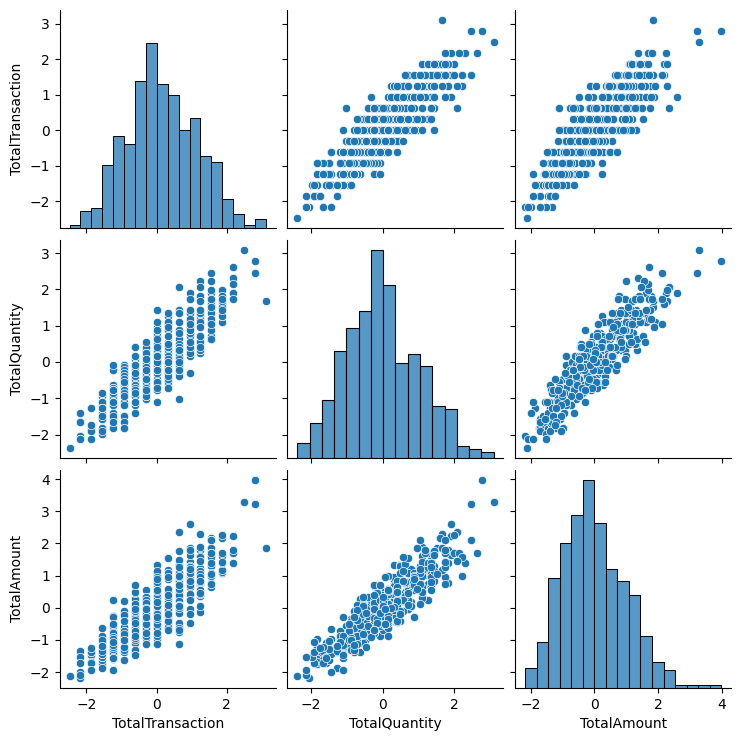

In [ ]:
sns.pairplot(new_dfoutlier_std)

#### Choose best K

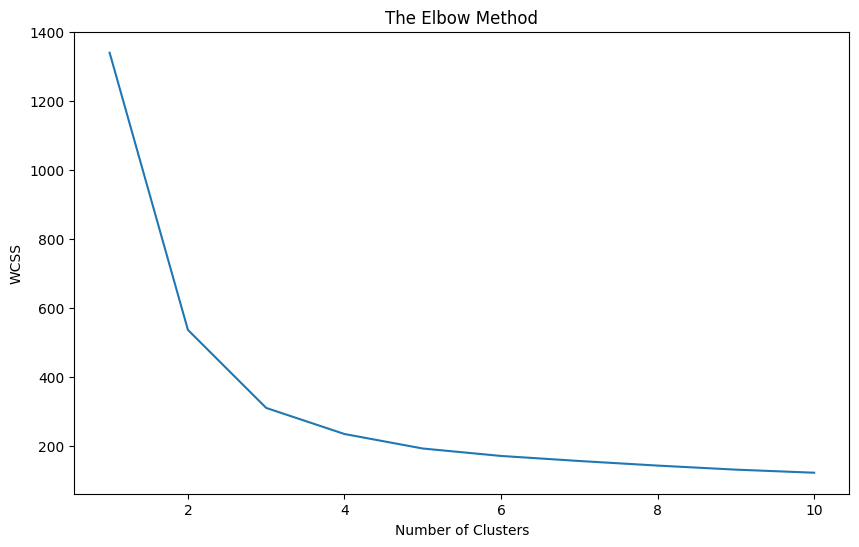

In [ ]:
# Elbow Method
# declare Within-Cluster Sum of Squares (wcss)
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(new_dfoutlier_std)
  wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

from elbow we can choose 3 or 4 cluster.

so we can u silhoute method to find the best number of cluster.

In [ ]:
# Silhoute Method
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(new_dfoutlier_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_dfoutlier_std,labels,metric="euclidean",random_state=42)))

Silhouette score for k(clusters) = 2 is 0.49073124255420875
Silhouette score for k(clusters) = 3 is 0.45013883130333615
Silhouette score for k(clusters) = 4 is 0.3798660395188382
Silhouette score for k(clusters) = 5 is 0.3429987726926139
Silhouette score for k(clusters) = 6 is 0.2964151227042256
Silhouette score for k(clusters) = 7 is 0.29728296547014943
Silhouette score for k(clusters) = 8 is 0.27451746131151633
Silhouette score for k(clusters) = 9 is 0.2764712341905337
Silhouette score for k(clusters) = 10 is 0.26156698777341475
Silhouette score for k(clusters) = 11 is 0.2734043930587353
Silhouette score for k(clusters) = 12 is 0.2517073152897929


from silhoutte score, 2 is the best number of cluster but for this case we will use 3 clusters.

In [ ]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(new_dfoutlier_std)
labels = kmeans.labels_
new_dfoutlier_std['label_kmeans'] = labels

In [ ]:
new_dfoutlier_std.head()

,TotalTransaction,TotalQuantity,TotalAmount,label_kmeans
0,1.870385,1.585851,2.180830,1
1,0.316944,1.269424,0.230142,1
2,1.249009,1.269424,0.747357,1
3,-0.304433,0.478357,-0.415771,2
4,-1.236498,-1.024671,-0.690162,0


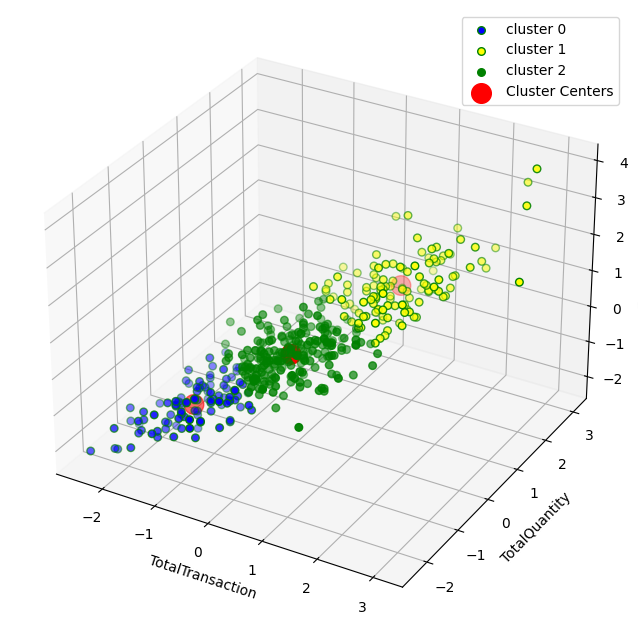

In [ ]:
colors_cluster=['blue','yellow', 'green']
label_cluster=['cluster 0', 'cluster 1', "cluster 2"]

# PLOTTING
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for points in clusters
for cluster_id in range(3):
    cluster_data = new_dfoutlier_std[new_dfoutlier_std["label_kmeans"] == cluster_id]
    ax.scatter(cluster_data["TotalTransaction"], cluster_data["TotalQuantity"], cluster_data["TotalAmount"],
               c=colors_cluster[cluster_id], s=30, edgecolor='green', label=label_cluster[cluster_id])

# Scatter plot for cluster centers (red)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, label='Cluster Centers')

# Set labels and legend
ax.set_xlabel('TotalTransaction')
ax.set_ylabel('TotalQuantity')
ax.set_zlabel('TotalAmount')
ax.legend()

plt.show()

In [ ]:
# copy label cluster to origin data
df_customer_clustering = aggregated_data.copy()
df_customer_clustering['cluster'] = kmeans.labels_

In [ ]:
df_customer_clustering.head()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount,cluster
0,1,17,60,623300,1
1,2,12,56,382300,1
2,3,15,56,446200,1
3,4,10,46,302500,2
4,5,7,27,268600,0


In [ ]:
# Calculate the average metrics for each cluster, including customer count, mean TotalTransaction, mean TotalQuantity, and mean TotalAmount.
df_customer_clustering.groupby('cluster').agg({'CustomerID':'count',
                                               'TotalTransaction':'mean',
                                               'TotalQuantity':'mean',
                                               'TotalAmount':'mean'
                                               }).sort_values(by='TotalAmount').reset_index()

,cluster,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
0,0,106,7.009434,24.669811,207579.245283
1,2,219,10.776256,38.511416,337747.031963
2,1,122,14.795082,55.819672,509905.737705


**Cluster 2 has the highest number of customers.**

**Cluster 0 (Moderate Spenders)**: This indicates that customers in this cluster tend to make purchases of moderate quantity and value.

**Cluster 1 (High Value Shoppers)**: This suggests that customers in this cluster tend to make purchases with a high monetary value.

**Cluster 2 (Balanced Shoppers)**: This implies that customers in this cluster exhibit balanced purchasing behavior in terms of both quantity and value.

In [ ]:
# save csv
df_customer_clustering.to_csv(folder_path+'df_customer_clustering.csv',index=False)

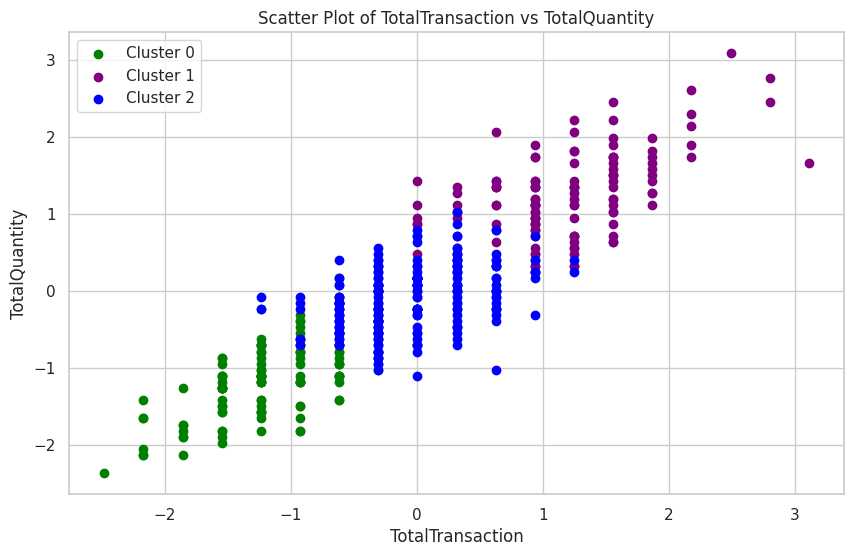

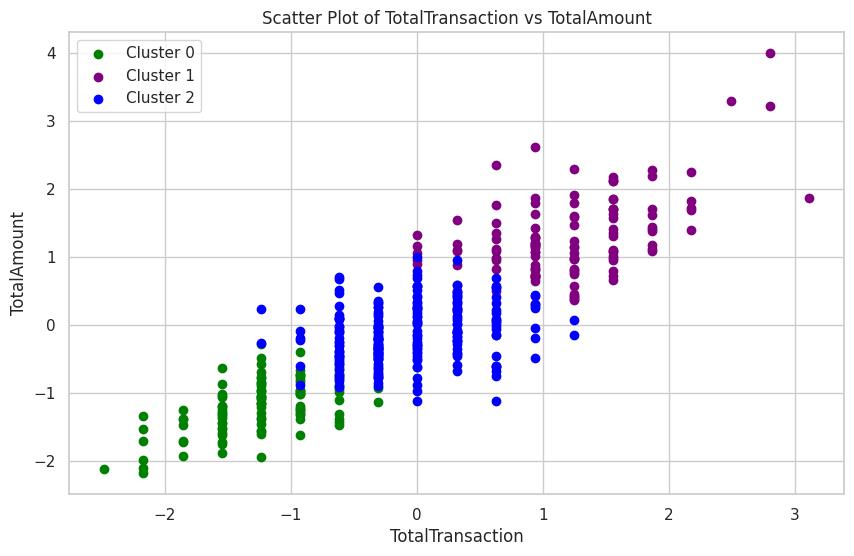

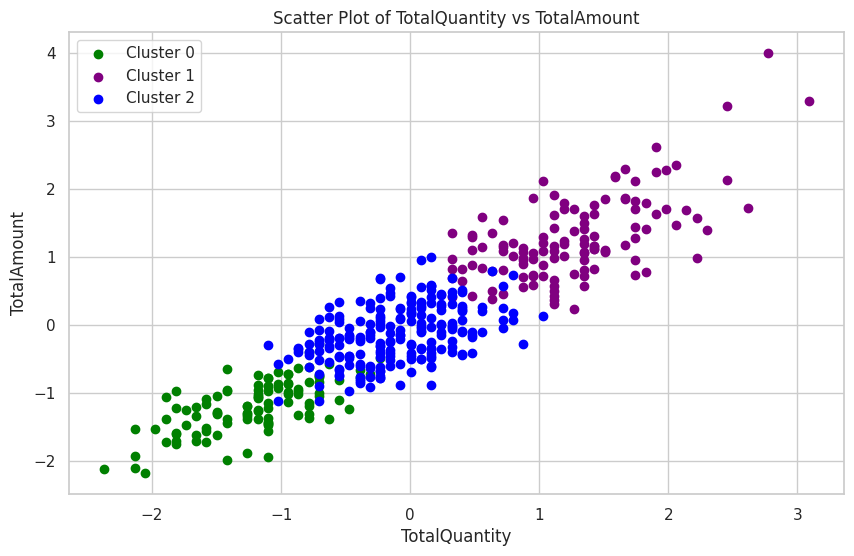

In [ ]:
# Set style
sns.set(style="whitegrid")

# Define colors for clusters
cluster_colors = ['green', 'purple','blue']

# Create scatter plots for each feature pair
feature_pairs = [('TotalTransaction', 'TotalQuantity'), ('TotalTransaction', 'TotalAmount'), ('TotalQuantity', 'TotalAmount')]

for pair in feature_pairs:
    plt.figure(figsize=(10, 6))
    for cluster_num in range(len(cluster_colors)):
        cluster_data = new_dfoutlier_std[new_dfoutlier_std.label_kmeans == cluster_num]
        plt.scatter(cluster_data[pair[0]], cluster_data[pair[1]], color=cluster_colors[cluster_num], label=f'Cluster {cluster_num}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.legend()
    plt.show()


### Conclusion

Cluster 0 (Moderate Spenders):

    Marketing Strategy: Encourage them to shop more frequently to increase their transaction value. Send marketing product notifications via email.
    Promotions: Offer special promotions and discounts to motivate this cluster to shop more.
    Other Initiatives: Provide incentives such as small points or rewards every time they make a purchase, empowering them to engage in transactions more frequently.

Cluster 2 (Balanced Shoppers):

    Marketing Strategy: Customers in this cluster have medium transaction values, indicating they are moderately active. Focus on maintaining their activity level and building further engagement.
    Promotions: Offer exclusive discounts or special deals available only to customers in this cluster as a form of appreciation.
    Loyalty Program: Provide points or rewards each time they make a purchase. This can enhance engagement and build long-term relationships.

Cluster 1 (High-Value Shoppers):

    Marketing Strategy: Focus on maintaining strong relationships with customers in this cluster, as they significantly contribute to the business.
    Premium Loyalty Program: Introduce a premium loyalty program that offers additional benefits to customers in this cluster. This could include exclusive discounts, early access to new products, or luxurious rewards.
    Cross-Selling and Up-Selling: Based on their previous purchasing patterns, offer complementary products or higher-value items to increase their transaction value.